In [1]:
import pandas as pd
from math import floor
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import Script.Image as Image

## DATA PREPROCESSING

In [2]:
training = pd.read_csv('Training.csv')

#### 1) Dealing with class imbalance

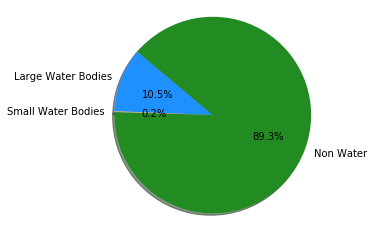

In [3]:
lwb, nw, n_swb = Image.class_piechart(training)

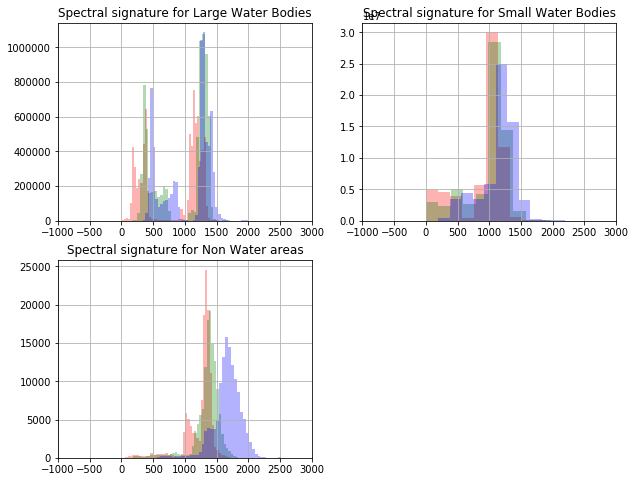

In [4]:
Image.class_spectral_signature(training)

In [5]:
training = shuffle(training)

In [6]:
lwb = training.loc[training['Content'] == 1]
nw = training.loc[training['Content'] == 3]

In [7]:
training = training.drop(lwb[2*n_swb:].index)

In [8]:
training = training.drop(nw[3*n_swb:].index)

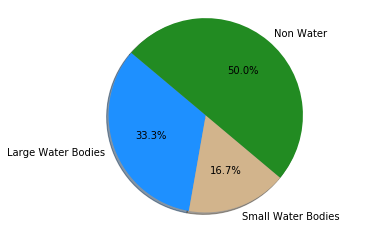

In [9]:
Image.class_piechart(training);

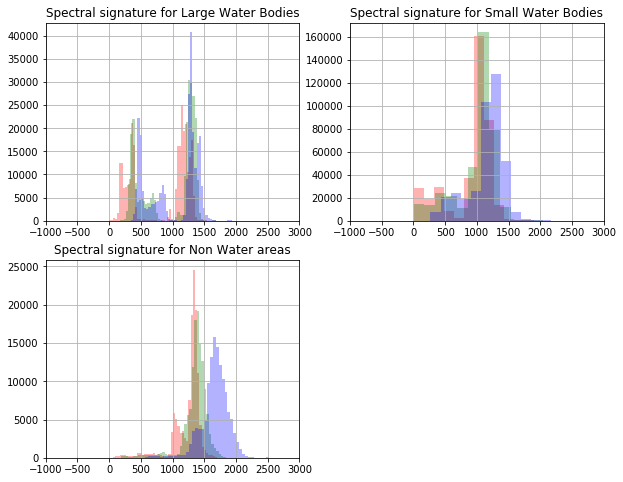

In [10]:
Image.class_spectral_signature(training)

In [11]:
training.to_csv(r'Clean_Training.csv')